<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Author: Kevin Markham (Washington, D.C.)_

---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### What is Dask?

Dask is very similar to pandas, but works with larger datasets (even ones that don't fit into memory)
where parallel processing helps. Set a reminder for yourself to learn about Dask this time next year.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

### Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Pandas

In [1]:
# Load Pandas into Python
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
my_first_series = pd.Series(index=[1,3,7,12], data=[0,6,0,1])
my_first_series

1     0
3     6
7     0
12    1
dtype: int64

In [3]:
my_first_dataframe = pd.DataFrame(
    {'column1' : my_first_series,
     'column2': pd.Series(index=[1,3,5], data=[30, 29, 30])}
)
my_first_dataframe

,column1,column2
1,0.0,30.0
3,6.0,29.0
5,NaN,30.0
7,0.0,NaN
12,1.0,NaN


In [4]:
my_First_dataframe

NameError: name 'my_First_dataframe' is not defined

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [11]:
users = pd.read_csv('./data/user.tbl', sep='|', index_col='user_id')

**Examine the users data.**

In [12]:
users                   # Print the first 30 and last 30 rows.

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [10]:
users.sample(5)

,user_id,age,gender,occupation,zip_code
272,273,50,F,other,10016
40,41,33,M,engineer,80525
908,909,50,F,educator,53171
139,140,30,F,student,32250
531,532,20,M,student,92705


In [7]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [13]:
users.head()            # Print the first five rows.

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [15]:
users.head(10)          # Print the first 10 rows.

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [16]:
users.head(10).head(3)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067


In [17]:
users.tail()            # Print the last five rows.

,age,gender,occupation,zip_code
user_id,,,,
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209
943,22,M,student,77841


In [18]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [19]:
# Column names (which is "an index")
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [20]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [21]:
# Number of rows and columns
users.shape

(943, 4)

In [22]:
# All values as a NumPy array
users.values

array([[24, 'M', 'technician', '85711'],
       [53, 'F', 'other', '94043'],
       [23, 'M', 'writer', '32067'],
       ...,
       [20, 'M', 'student', '97229'],
       [48, 'F', 'librarian', '78209'],
       [22, 'M', 'student', '77841']], dtype=object)

In [23]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [24]:
type(users.columns)

pandas.core.indexes.base.Index

In [25]:
users.T

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
age,24,53,23,24,33,42,57,36,29,53,...,61,42,24,48,38,26,32,20,48,22
gender,M,F,M,M,F,M,M,M,M,M,...,M,M,M,M,F,F,M,M,F,M
occupation,technician,other,writer,technician,other,executive,administrator,administrator,student,lawyer,...,engineer,doctor,other,educator,technician,student,administrator,student,librarian,student
zip_code,85711,94043,32067,43537,15213,98101,91344,05201,01002,90703,...,22902,66221,32789,98072,55038,33319,02215,97229,78209,77841


** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [26]:
# select * from users
# select gender from users

In [27]:
users['gender']

user_id
1      M
2      F
3      M
4      M
5      F
6      M
7      M
8      M
9      M
10     M
11     F
12     F
13     M
14     M
15     F
16     M
17     M
18     F
19     M
20     F
21     M
22     M
23     F
24     F
25     M
26     M
27     F
28     M
29     M
30     M
      ..
914    F
915    M
916    M
917    F
918    M
919    M
920    F
921    F
922    F
923    M
924    M
925    F
926    M
927    M
928    M
929    M
930    F
931    M
932    M
933    M
934    M
935    M
936    M
937    M
938    F
939    F
940    M
941    M
942    F
943    M
Name: gender, Length: 943, dtype: object

In [28]:
type(users['gender'])

pandas.core.series.Series

In [29]:
users.gender

user_id
1      M
2      F
3      M
4      M
5      F
6      M
7      M
8      M
9      M
10     M
11     F
12     F
13     M
14     M
15     F
16     M
17     M
18     F
19     M
20     F
21     M
22     M
23     F
24     F
25     M
26     M
27     F
28     M
29     M
30     M
      ..
914    F
915    M
916    M
917    F
918    M
919    M
920    F
921    F
922    F
923    M
924    M
925    F
926    M
927    M
928    M
929    M
930    F
931    M
932    M
933    M
934    M
935    M
936    M
937    M
938    F
939    F
940    M
941    M
942    F
943    M
Name: gender, Length: 943, dtype: object

In [30]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['gender'].shape

(943,)

In [31]:
users[   ['age', 'gender']    ]

,age,gender
user_id,,
1,24,M
2,53,F
3,23,M
4,24,M
5,33,F
6,42,M
7,57,M
8,36,M
9,29,M


In [32]:
users[     ['gender']     ]

,gender
user_id,
1,M
2,F
3,M
4,M
5,F
6,M
7,M
8,M
9,M


In [33]:
users[['gender']].shape

(943, 1)

In [34]:
users['gender'].shape

(943,)

In [35]:
# DataFrame columns are Pandas Series.
type(users['gender'])

pandas.core.series.Series

In [36]:
type(users[['gender']])

pandas.core.frame.DataFrame

In [38]:
# Select one column using the DataFrame attribute.
users.gender
# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

user_id
1      M
2      F
3      M
4      M
5      F
6      M
7      M
8      M
9      M
10     M
11     F
12     F
13     M
14     M
15     F
16     M
17     M
18     F
19     M
20     F
21     M
22     M
23     F
24     F
25     M
26     M
27     F
28     M
29     M
30     M
      ..
914    F
915    M
916    M
917    F
918    M
919    M
920    F
921    F
922    F
923    M
924    M
925    F
926    M
927    M
928    M
929    M
930    F
931    M
932    M
933    M
934    M
935    M
936    M
937    M
938    F
939    F
940    M
941    M
942    F
943    M
Name: gender, Length: 943, dtype: object

In [39]:
double_index_frame = pd.DataFrame({
    'column1': pd.Series(index=[1,1,1,2,3], data=[5,6,6,7,8])
})
double_index_frame

,column1
1,5
1,6
1,6
2,7
3,8


In [40]:
double_index_frame.drop_duplicates()

,column1
1,5
1,6
2,7
3,8


In [ ]:
pd.read_excel('data.xlsx')

In [ ]:
pd.read_sql("select * from users", sql_connection)

In [195]:
pd.__version__

'0.24.2'

In [ ]:
pd.read_html(url, skiprows=1)

In [52]:
url='https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_India'
towers = pd.read_html(url)[0]
towers.sample(5)

,Rank,Name,City,Height,Floors,Year,Building type,Reference(s)
20,22,Lodha Bellissimo Tower 1,Mumbai,197.5 metres (648 ft),53,2012,Residential,[35][36]
19,21,One ICC,Mumbai,197.6 metres (648 ft),61,2018,Residential,[34]
4,5,The 42,Kolkata,249 metres (817 ft)[a],65,2019,Residential,[10]
33,35,Lodha Primero,Mumbai,190 metres (623 ft),52,2014,Residential,[45][46][47]
3,4,Three Sixty West Tower A,Mumbai,255.6 metres (839 ft),52,2019,Commercial,[7]


In [194]:
towers.head(20)

,Rank,Name,City,Height,Floors,Year,Building type,Reference(s),split_height,metres_string,metres
0,1,Lodha The Park 1,Mumbai,268 metres (879 ft),78,2019,Residential,[2][5],"[268, metres, (879, ft)]",268,268.0
1,2,The Imperial I,Mumbai,256 metres (840 ft),60,2010,Residential,[6],"[256, metres, (840, ft)]",256,256.0
2,2,The Imperial II,Mumbai,256 metres (840 ft),60,2010,Residential,[6],"[256, metres, (840, ft)]",256,256.0
3,4,Three Sixty West Tower A,Mumbai,255.6 metres (839 ft),52,2019,Commercial,[7],"[255.6, metres, (839, ft)]",255.6,255.6
4,5,The 42,Kolkata,249 metres (817 ft)[a],65,2019,Residential,[10],"[249, metres, (817, ft)[a]]",249,249.0
5,6,Ahuja Towers,Mumbai,248.5 metres (815 ft),54,2014,Residential,[11][12],"[248.5, metres, (815, ft)]",248.5,248.5
6,7,One Avighna Park,Mumbai,247 metres (810 ft),64,2017,Residential,[13][14],"[247, metres, (810, ft)]",247,247.0
7,8,Crescent Bay Tower 6,Mumbai,239.7 metres (786 ft),62,2019,Residential,[15][16],"[239.7, metres, (786, ft)]",239.7,239.7
8,9,Auris Serenity Tower 1,Mumbai,235 metres (771 ft),69,2018,Residential,[17][18],"[235, metres, (771, ft)]",235,235.0
9,9,Auris Serenity Tower 2,Mumbai,235 metres (771 ft),69,2019,Residential,[18][19],"[235, metres, (771, ft)]",235,235.0


In [47]:
pd.read_sql?

In [45]:
multilevel_index_frame = pd.DataFrame({
    'country': ['India',
               'Australia',
               'Singapore', 
               'USA',
               'Vanuatu'],
    'secondary_level_index': [1,1,1,2,3],
    'data': [5,6,6,7,8]
})
multilevel_index_frame.set_index(['country', 'secondary_level_index'])

,,data
country,secondary_level_index,
India,1,5
Australia,1,6
Singapore,1,6
USA,2,7
Vanuatu,3,8



**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [53]:
# Describe all numeric columns.
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [54]:
users.reset_index().describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [55]:
towers.describe()

,Rank,Year
count,34.000000,34.000000
mean,17.705882,2015.411765
std,10.154949,3.499936
min,1.000000,2009.000000
25%,9.000000,2012.000000
50%,18.500000,2017.000000
75%,26.000000,2019.000000
max,35.000000,2019.000000


In [57]:
towers.dtypes

Rank              int64
Name             object
City             object
Height           object
Floors           object
Year              int64
Building type    object
Reference(s)     object
dtype: object

In [58]:
towers

,Rank,Name,City,Height,Floors,Year,Building type,Reference(s)
0,1,Lodha The Park 1,Mumbai,268 metres (879 ft),78,2019,Residential,[2][5]
1,2,The Imperial I,Mumbai,256 metres (840 ft),60,2010,Residential,[6]
2,2,The Imperial II,Mumbai,256 metres (840 ft),60,2010,Residential,[6]
3,4,Three Sixty West Tower A,Mumbai,255.6 metres (839 ft),52,2019,Commercial,[7]
4,5,The 42,Kolkata,249 metres (817 ft)[a],65,2019,Residential,[10]
5,6,Ahuja Towers,Mumbai,248.5 metres (815 ft),54,2014,Residential,[11][12]
6,7,One Avighna Park,Mumbai,247 metres (810 ft),64,2017,Residential,[13][14]
7,8,Crescent Bay Tower 6,Mumbai,239.7 metres (786 ft),62,2019,Residential,[15][16]
8,9,Auris Serenity Tower 1,Mumbai,235 metres (771 ft),69,2018,Residential,[17][18]
9,9,Auris Serenity Tower 2,Mumbai,235 metres (771 ft),69,2019,Residential,[18][19]


In [59]:
# Describe all object columns (can include multiple types).
type(users.describe(include=['object']))

pandas.core.frame.DataFrame

In [63]:
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [64]:
towers.describe(include=['object'])

,Name,City,Height,Floors,Building type,Reference(s)
count,34,34,34,34,34,34
unique,34,3,24,22,3,27
top,Lodha The Park 1,Mumbai,193.8 metres (636 ft),42,Residential,[40]
freq,1,32,4,4,31,4


In [65]:
a = users.describe(include=['object'])

In [66]:
a.head()

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [67]:
a['zip_counts'] = [len(a.zip_code), 19, 45, 29]

In [68]:
a

,gender,occupation,zip_code,zip_counts
count,943,943,943,4
unique,2,21,795,19
top,M,student,55414,45
freq,670,196,9,29


In [69]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [74]:
summary_df = users.describe(include='all')
summary_df.to_csv('summary.csv')

In [ ]:
summary_df.to_excel('summary.xlsx')
summary_df.to_sql

In [70]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [71]:
# Calculate the mean of the ages.
users.age.mean()

34.05196182396607

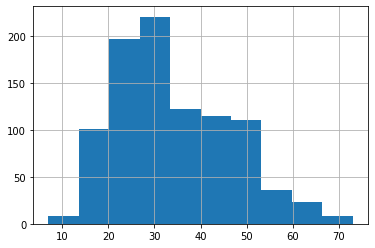

In [72]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist();

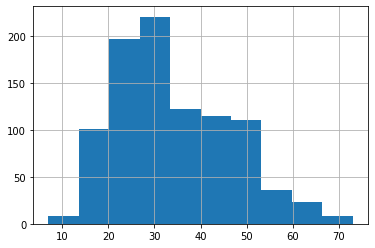

In [73]:
(fig, ax) = plt.subplots()
users.age.hist(ax=ax)
fig.savefig("histogram2.png")

**Count the number of occurrences of each value.**

In [75]:
users.gender.value_counts()     # Most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

In [76]:
towers.City.value_counts()

Mumbai     32
Kolkata     1
Gurgaon     1
Name: City, dtype: int64

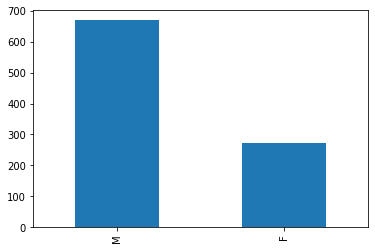

In [77]:
users.gender.value_counts().plot(kind='bar')     # Quick plot by category

In [78]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

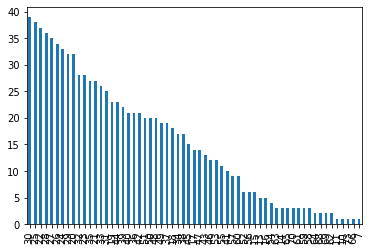

In [80]:
users.age.value_counts().plot.bar()

In [82]:
users.age.value_counts().sort_index()

7      1
10     1
11     1
13     5
14     3
15     6
16     5
17    14
18    18
19    23
20    32
21    27
22    37
23    28
24    33
25    38
26    34
27    35
28    36
29    32
30    39
31    25
32    28
33    26
34    17
35    27
36    21
37    19
38    17
39    22
      ..
41    10
42    21
43    13
44    23
45    15
46    12
47    14
48    20
49    19
50    20
51    20
52     6
53    12
54     4
55    11
56     6
57     9
58     3
59     3
60     9
61     3
62     2
63     3
64     2
65     3
66     1
68     2
69     2
70     3
73     1
Name: age, Length: 61, dtype: int64

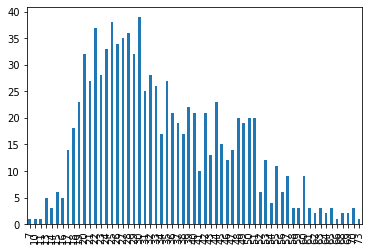

In [86]:
users.age.value_counts().sort_index().plot.bar()

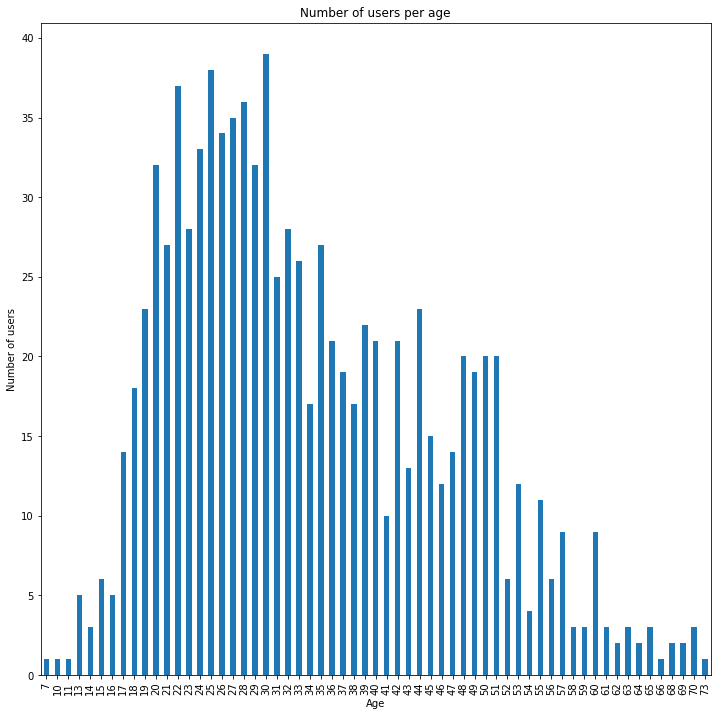

In [87]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
### Exercise 1

In [88]:
# Read drinks.csv into a DataFrame called "drinks".
drinks = pd.read_csv('data/drinks.csv')
drinks.sample(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
121,New Zealand,203,79,175,9.3,OC
155,Slovakia,196,293,116,11.4,EU
184,USA,249,158,84,8.7,NaN
122,Nicaragua,78,118,1,3.5,NaN
150,Senegal,9,1,7,0.3,AF


In [89]:
# Print the head and the tail.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [90]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [91]:
# Examine the default index, datatypes, and shape.
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [92]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [93]:
# Print the beer_servings Series.
drinks['beer_servings']

0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

In [96]:
drinks.set_index('country').beer_servings

country
Afghanistan               0
Albania                  89
Algeria                  25
Andorra                 245
Angola                  217
Antigua & Barbuda       102
Argentina               193
Armenia                  21
Australia               261
Austria                 279
Azerbaijan               21
Bahamas                 122
Bahrain                  42
Bangladesh                0
Barbados                143
Belarus                 142
Belgium                 295
Belize                  263
Benin                    34
Bhutan                   23
Bolivia                 167
Bosnia-Herzegovina       76
Botswana                173
Brazil                  245
Brunei                   31
Bulgaria                231
Burkina Faso             25
Burundi                  88
Cote d'Ivoire            37
Cabo Verde              144
                       ... 
Suriname                128
Swaziland                90
Sweden                  152
Switzerland             185
Syria       

In [97]:
# Calculate the average beer_servings for the entire data set.
drinks.beer_servings.mean()

106.16062176165804

In [98]:
drinks.beer_servings.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [99]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [100]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [108]:
drinks_better = pd.read_csv('data/drinks.csv',
                           index_col='country',
                           na_filter=False)
drinks_better

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF
Antigua & Barbuda,102,128,45,4.9,NA
Argentina,193,25,221,8.3,SA
Armenia,21,179,11,3.8,EU
Australia,261,72,212,10.4,OC


In [110]:
drinks_better.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**Logical filtering: Only show users with age < 20.**

In [ ]:
# select * from drinks where continent is null
# select * from drinks where continent = 'AF'

In [114]:
#users['gender'],
#users[['age', 'gender']]


In [116]:
users['age'] < 30

user_id
1       True
2      False
3       True
4       True
5      False
6      False
7      False
8      False
9       True
10     False
11     False
12      True
13     False
14     False
15     False
16      True
17     False
18     False
19     False
20     False
21      True
22      True
23     False
24      True
25     False
26     False
27     False
28     False
29     False
30      True
       ...  
914    False
915    False
916     True
917     True
918    False
919     True
920    False
921     True
922     True
923     True
924     True
925     True
926    False
927     True
928     True
929    False
930     True
931    False
932    False
933     True
934    False
935    False
936     True
937    False
938    False
939     True
940    False
941     True
942    False
943     True
Name: age, Length: 943, dtype: bool

In [117]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
users[users['age'] < 20].head()

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
36,19,F,student,93117
52,18,F,student,55105
57,16,M,none,84010
67,17,M,student,60402


In [118]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
mask = users.age < 20
users[mask].head()

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
36,19,F,student,93117
52,18,F,student,55105
57,16,M,none,84010
67,17,M,student,60402


In [119]:
# Or, combine into a single step.
# select * from users where users.occupation = 'student'
mask = users.occupation == 'student'
student_frame = users[mask]
student_frame

,age,gender,occupation,zip_code
user_id,,,,
9,29,M,student,01002
30,7,M,student,55436
32,28,F,student,78741
33,23,M,student,27510
36,19,F,student,93117
37,23,M,student,55105
49,23,F,student,76111
52,18,F,student,55105
66,23,M,student,80521


In [120]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc and .iloc instead of the syntax below

student_frame['age'] = 12

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
student_frame = users[users.occupation == 'student'].copy()
student_frame['age'] = 12
student_frame

,age,gender,occupation,zip_code
user_id,,,,
9,12,M,student,01002
30,12,M,student,55436
32,12,F,student,78741
33,12,M,student,27510
36,12,F,student,93117
37,12,M,student,55105
49,12,F,student,76111
52,12,F,student,55105
66,12,M,student,80521


In [122]:
# Select one column from the filtered results.
#student_frame.iloc[:5, :2]
users.loc[8, 'age'] = 12

In [123]:
# value_counts of resulting Series
users.age.unique()

array([24, 53, 23, 33, 42, 57, 12, 29, 39, 28, 47, 45, 49, 21, 30, 35, 40,
       26, 25, 32, 41,  7, 38, 20, 19, 27, 18, 22, 37, 16, 50, 36, 31, 51,
       17, 48, 34, 43, 60, 55, 15, 61, 44, 54, 59, 46, 13, 52, 56, 14, 66,
       62, 11, 65, 68, 63, 64, 10, 73, 58, 69, 70], dtype=int64)

In [124]:
users.age.nunique()

62

In [125]:
users.occupation.nunique()

21

**Logical filtering with multiple conditions**

In [ ]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
drinks.head()

In [126]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
mask = (drinks.beer_servings > 25) & (drinks.continent == 'EU')
drinks[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU


In [127]:
mask = (drinks.beer_servings > 25) & (drinks.continent == 'EU') | (drinks.wine_servings > 200)
drinks[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
6,Argentina,193,25,221,8.3,SA
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [128]:
drinks[drinks.beer_servings > 25 & drinks.continent == 'EU']

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

In [129]:
drinks[(drinks.beer_servings > 25) & (drinks.continent == 'EU')]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU
44,Cyprus,192,154,113,8.2,EU
45,Czech Republic,361,170,134,11.8,EU


In [130]:
# Preferred alternative to multiple `OR` conditions
#users[users.occupation.isin(['doctor', 'lawyer'])]
users[['age', 'gender', 'occupation']].head()

,age,gender,occupation
user_id,,,
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other


In [132]:
users[users.occupation.isin(['doctor', 'lawyer'])]

,age,gender,occupation,zip_code
user_id,,,,
10,53,M,lawyer,90703
125,30,M,lawyer,22202
126,28,F,lawyer,20015
138,46,M,doctor,53211
161,50,M,lawyer,55104
205,47,M,lawyer,06371
251,28,M,doctor,85032
299,29,M,doctor,63108
339,35,M,lawyer,37901


In [133]:
a = ['a', 'b', 'c', 10]
for entry in a:
    if entry in users.age:
        print(entry)

10


In [136]:
drinks[drinks.continent.isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [137]:
drinks[~drinks.continent.isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [ ]:
drinks[drinks.continent.notnull()]
# select * from drinks where drinks.continent not null

**Sorting**

In [138]:
# Sort a Series.
users.age.sort_values()

user_id
30      7
471    10
289    11
8      12
628    13
880    13
609    13
142    13
674    13
813    14
206    14
887    14
179    15
849    15
618    15
101    15
281    15
461    15
57     16
580    16
550    16
451    16
434    16
621    17
619    17
761    17
375    17
646    17
904    17
397    17
       ..
90     60
931    60
308    60
900    60
694    60
469    60
752    60
464    60
934    61
106    61
351    61
520    62
266    62
858    63
777    63
364    63
845    64
423    64
651    65
318    65
564    65
211    66
573    68
349    68
559    69
585    69
767    70
860    70
803    70
481    73
Name: age, Length: 943, dtype: int64

In [139]:
users.sort_values('age')

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
471,10,M,student,77459
289,11,M,none,94619
8,12,M,administrator,05201
628,13,M,none,94306
880,13,M,student,83702
609,13,F,student,55106
142,13,M,other,48118
674,13,F,student,55337


In [140]:
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,12,M,administrator,05201
9,29,M,student,01002


In [141]:
users.sort_values('age', inplace = True)

In [143]:
users.sort_values('age', inplace = True, ascending=False)

In [144]:
users.head(5)

,age,gender,occupation,zip_code
user_id,,,,
481,73,M,retired,37771
803,70,M,administrator,78212
860,70,F,retired,48322
767,70,M,engineer,00000
585,69,M,librarian,98501


In [ ]:
# select * from users order by age asc

In [145]:
users.age.sort_values(inplace = True)

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [148]:
# Sort a DataFrame by a single column.
g = users.age
users.sort_values('age')
id(g)

1659683144088

In [149]:
id(users.age)

1659683144088

In [ ]:
g.sort_values(inplace = True)

In [ ]:
# Use descending order instead.
users.sort_values('age', ascending=False).head()

In [150]:
# Sort by multiple columns.
users.sort_values(
    ['occupation', 'age'], ascending = [True, False]
).head()

,age,gender,occupation,zip_code
user_id,,,,
803,70,M,administrator,78212
266,62,F,administrator,78756
131,59,F,administrator,15237
819,59,M,administrator,40205
7,57,M,administrator,91344


<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [151]:
# Filter DataFrame to only include European countries.
drinks[drinks.continent == 'EU']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [152]:
# Filter DataFrame to only include European countries with wine_servings > 300.
drinks[(drinks.continent == 'EU') & (drinks.wine_servings > 300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [153]:
# Calculate the average beer_servings for all of Europe.
drinks[drinks.continent == 'EU'].beer_servings.mean()

193.77777777777777

In [ ]:
# select mean(beer_servings) from drinks where drinks.continent = 'EU'

In [156]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.
drinks.sort_values('total_litres_of_pure_alcohol',
                   ascending=False
                  ).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


In [159]:
drinks.nlargest(10, 'total_litres_of_pure_alcohol')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
99,Luxembourg,236,133,271,11.4,EU
155,Slovakia,196,293,116,11.4,EU


In [158]:
drinks.nlargest?

<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

In [160]:
# Print the column labels
print(drinks.columns)

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')


In [161]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(
    columns={'beer_servings':'beer',
             'wine_servings':'wine'}
)

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [162]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [163]:
# Rename one or more columns in the original DataFrame.
drinks.rename(
    columns={'beer_servings':'beer', 
             'wine_servings':'wine'}, 
    inplace=True)

In [164]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)

In [165]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [166]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [167]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


In [169]:
towers['split_height'] = towers.Height.str.split()
towers.sample(5)

,Rank,Name,City,Height,Floors,Year,Building type,Reference(s),split_height
32,32,Orchid Woods 3,Mumbai,190 metres (623 ft),58,2012,Residential,[44],"[190, metres, (623, ft)]"
16,18,Crescent Bay Tower 4,Mumbai,206 metres (676 ft),58,2019,Residential,[30][31][16],"[206, metres, (676, ft)]"
7,8,Crescent Bay Tower 6,Mumbai,239.7 metres (786 ft),62,2019,Residential,[15][16],"[239.7, metres, (786, ft)]"
24,26,Raheja Vivarea 1,Mumbai,193.8 metres (636 ft),42,2012,Residential,[40],"[193.8, metres, (636, ft)]"
14,15,Omkar Alta Monte Tower C,Mumbai,218.3 metres (716 ft),58/63,2019,Residential,[25][26][27],"[218.3, metres, (716, ft)]"


In [170]:
def first_element(x):
    return x[0]
towers['metres_string'] = towers.split_height.map(first_element)
towers.sample(5)

,Rank,Name,City,Height,Floors,Year,Building type,Reference(s),split_height,metres_string
4,5,The 42,Kolkata,249 metres (817 ft)[a],65,2019,Residential,[10],"[249, metres, (817, ft)[a]]",249
0,1,Lodha The Park 1,Mumbai,268 metres (879 ft),78,2019,Residential,[2][5],"[268, metres, (879, ft)]",268
11,12,Crescent Bay Tower 5,Mumbai,222 metres (728 ft),63,2019,Residential,[22][16],"[222, metres, (728, ft)]",222
18,20,Kalpataru Avana,Mumbai,201 metres (659 ft),52,2019,Residential,[33],"[201, metres, (659, ft)]",201
32,32,Orchid Woods 3,Mumbai,190 metres (623 ft),58,2012,Residential,[44],"[190, metres, (623, ft)]",190


In [171]:
towers.dtypes

Rank              int64
Name             object
City             object
Height           object
Floors           object
Year              int64
Building type    object
Reference(s)     object
split_height     object
metres_string    object
dtype: object

In [173]:
towers['metres'] = towers.metres_string.map(float)
towers.dtypes

Rank               int64
Name              object
City              object
Height            object
Floors            object
Year               int64
Building type     object
Reference(s)      object
split_height      object
metres_string     object
metres           float64
dtype: object

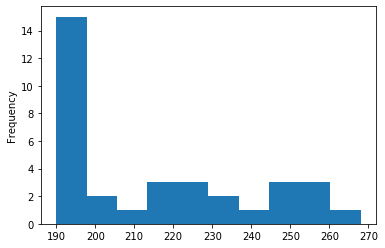

In [174]:
towers.metres.plot.hist()

In [175]:
towers.metres.mean()

215.3088235294118

In [176]:
towers.metres.describe()

count     34.000000
mean     215.308824
std       24.781449
min      190.000000
25%      193.800000
50%      203.950000
75%      235.000000
max      268.000000
Name: metres, dtype: float64

In [183]:
drinks.sort_values('liters')

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
147,San Marino,0,0,0,0.0,EU,0,0.0
128,Pakistan,0,0,0,0.0,AS,0,0.0
46,North Korea,0,0,0,0.0,AS,0,0.0
13,Bangladesh,0,0,0,0.0,AS,0,0.0
111,Monaco,0,0,0,0.0,EU,0,0.0
106,Marshall Islands,0,0,0,0.0,OC,0,0.0
103,Maldives,0,0,0,0.0,AS,0,0.0
107,Mauritania,0,0,0,0.0,AF,0,0.0
90,Kuwait,0,0,0,0.0,AS,0,0.0


In [180]:
drinks

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,4900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0


In [185]:
view_of_users_who_are_students = users[users.occupation == 'student']

In [186]:
new_frame = users[users.occupation == 'student'].copy()

In [187]:
new_frame['university'] = new_frame.age > 18
new_frame

,age,gender,occupation,zip_code,university
user_id,,,,,
188,42,M,student,29440,True
565,40,M,student,55422,True
861,38,F,student,14085,True
577,36,F,student,77845,True
378,35,M,student,02859,True
742,35,M,student,29210,True
124,34,M,student,60615,True
778,34,M,student,01960,True
890,32,M,student,97301,True


In [189]:
drinks.isnull().any()

country      False
beer         False
spirit       False
wine         False
liters       False
continent     True
servings     False
mL           False
dtype: bool

In [191]:
drinks.dropna?

In [192]:
drinks.fillna?

In [196]:
drinks.sample(5)

,country,beer,spirit,wine,liters,continent,servings,mL
1,Albania,89,132,54,4.9,EU,275,4900.0
26,Burkina Faso,25,7,7,4.3,AF,39,4300.0
119,Nepal,5,6,0,0.2,AS,11,200.0
129,Palau,306,63,23,6.9,OC,392,6900.0
106,Marshall Islands,0,0,0,0.0,OC,0,0.0


**Removing Columns**

In [198]:
drinks[drinks.spirit == 138]

,country,beer,spirit,wine,liters,continent,servings,mL
3,Andorra,245,138,312,12.4,EU,695,12400.0


In [ ]:
drinks = drinks[drinks.spirit != 138]

In [199]:
drinks.drop(3)

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
4,Angola,217,57,45,5.9,AF,319,5900.0
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,4900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0
10,Azerbaijan,21,46,5,1.3,EU,72,1300.0


In [ ]:
# axis=0 for rows, 1 for columns

# drinks.drop(drinks[drinks.spirit == 138].index.values[0])
drinks.drop(13)
drinks.iloc[13]

In [200]:
drinks[drinks.country == 'Andorra']

,country,beer,spirit,wine,liters,continent,servings,mL
3,Andorra,245,138,312,12.4,EU,695,12400.0


In [203]:
drinks.set_index('country', inplace=True)
drinks.sample(5)

,beer,spirit,wine,liters,continent,servings,mL
country,,,,,,,
Djibouti,15,44,3,1.1,AF,62,1100.0
Bolivia,167,41,8,3.8,SA,216,3800.0
Central African Republic,17,2,1,1.8,AF,20,1800.0
Dominican Republic,193,147,9,6.2,NaN,349,6200.0
Croatia,230,87,254,10.2,EU,571,10200.0


In [204]:
drinks.loc['Andorra']

beer           245
spirit         138
wine           312
liters        12.4
continent       EU
servings       695
mL           12400
Name: Andorra, dtype: object

In [205]:
drinks.iloc[3]

beer           245
spirit         138
wine           312
liters        12.4
continent       EU
servings       695
mL           12400
Name: Andorra, dtype: object

In [201]:
drinks.loc[3]

country      Andorra
beer             245
spirit           138
wine             312
liters          12.4
continent         EU
servings         695
mL             12400
Name: 3, dtype: object

In [206]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,beer,spirit,wine,liters,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF
Antigua & Barbuda,102,128,45,4.9,NaN
Argentina,193,25,221,8.3,SA
Armenia,21,179,11,3.8,EU
Australia,261,72,212,10.4,OC


In [ ]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [208]:
drinks['ml'] = drinks.liters * 1000
drinks

,beer,spirit,wine,liters,continent,servings,mL,ml
country,,,,,,,,
Afghanistan,0,0,0,0.0,AS,0,0.0,0.0
Albania,89,132,54,4.9,EU,275,4900.0,4900.0
Algeria,25,0,14,0.7,AF,39,700.0,700.0
Andorra,245,138,312,12.4,EU,695,12400.0,12400.0
Angola,217,57,45,5.9,AF,319,5900.0,5900.0
Antigua & Barbuda,102,128,45,4.9,NaN,275,4900.0,4900.0
Argentina,193,25,221,8.3,SA,439,8300.0,8300.0
Armenia,21,179,11,3.8,EU,211,3800.0,3800.0
Australia,261,72,212,10.4,OC,545,10400.0,10400.0


In [209]:
del drinks['ml']

In [210]:
drinks

,beer,spirit,wine,liters,continent,servings,mL
country,,,,,,,
Afghanistan,0,0,0,0.0,AS,0,0.0
Albania,89,132,54,4.9,EU,275,4900.0
Algeria,25,0,14,0.7,AF,39,700.0
Andorra,245,138,312,12.4,EU,695,12400.0
Angola,217,57,45,5.9,AF,319,5900.0
Antigua & Barbuda,102,128,45,4.9,NaN,275,4900.0
Argentina,193,25,221,8.3,SA,439,8300.0
Armenia,21,179,11,3.8,EU,211,3800.0
Australia,261,72,212,10.4,OC,545,10400.0


In [211]:
drinks.sum()

beer         20489.0
spirit       15632.0
wine          9544.0
liters         910.4
servings     45665.0
mL          910400.0
dtype: float64

In [212]:
drinks.sum(axis=1)

country
Afghanistan                 0.0
Albania                  5454.9
Algeria                   778.7
Andorra                 13802.4
Angola                   6543.9
Antigua & Barbuda        5454.9
Argentina                9186.3
Armenia                  4225.8
Australia               11500.4
Austria                 10799.7
Azerbaijan               1445.3
Bahamas                  7004.3
Bahrain                  2226.0
Bangladesh                  0.0
Barbados                 7010.3
Belarus                 15528.4
Belgium                 11692.5
Belize                   7576.8
Benin                    1203.1
Bhutan                    446.4
Bolivia                  4235.8
Bosnia-Herzegovina       5118.6
Botswana                 5891.4
Brazil                   8019.2
Brunei                    668.6
Bulgaria                11464.3
Burkina Faso             4382.3
Burundi                  6482.3
Cote d'Ivoire            4094.0
Cabo Verde               4436.0
                         ...   


In [214]:
drinks.reset_index(inplace=True)
drinks

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,4900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0


In [215]:
drinks.sum()

country     AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                    20489
spirit                                                  15632
wine                                                     9544
liters                                                  910.4
servings                                                45665
mL                                                     910400
dtype: object

In [219]:
drinks.continent.unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [220]:
drinks_better.sum()

beer_servings                                                               20489
spirit_servings                                                             15632
wine_servings                                                                9544
total_litres_of_pure_alcohol                                                910.4
continent                       ASEUAFEUAFNASAEUOCEUEUNAASASNAEUEUNAAFASSAEUAF...
dtype: object

In [225]:
drinks.continent[drinks.continent.notnull()].sum()

'ASEUAFEUAFSAEUOCEUEUASASEUEUAFASSAEUAFSAASEUAFAFAFAFASAFAFAFSAASSAAFAFOCEUEUEUASAFEUAFSAAFAFAFEUAFOCEUEUAFAFEUEUAFEUAFAFSAEUEUASASASASEUASEUASASASAFOCASASASEUASAFAFAFEUEUAFAFASASAFEUOCAFAFOCEUASEUAFAFASAFOCASEUOCAFAFOCEUASASOCOCSASAASEUEUASASEUEUASAFOCEUAFASAFEUAFAFASEUEUOCAFAFEUASAFSAAFEUEUASASASEUASAFOCAFASASOCAFEUASEUAFSAASOCSAASASAFAF'

In [217]:
towers.sum()

Rank                                                           602
Name             Lodha The Park 1The Imperial IThe Imperial IIT...
City             MumbaiMumbaiMumbaiMumbaiKolkataMumbaiMumbaiMum...
Height           268 metres (879 ft)256 metres (840 ft)256 metr...
Floors           786060526554646269696863575658/636558505261534...
Year                                                         68524
Building type    ResidentialResidentialResidentialCommercialRes...
Reference(s)     [2][5][6][6][7][10][11][12][13][14][15][16][17...
split_height     [268, metres, (879, ft), 256, metres, (840, ft...
metres_string    268256256255.6249248.5247239.7235235223.222222...
metres                                                      7320.5
dtype: object

In [229]:
pd.read_csv('data/drinks.csv', keep_default_na=False, na_values=['N/A'])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [228]:
pd.read_csv?

<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [231]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [233]:
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [235]:
drinks.continent.value_counts().sum(), drinks.shape

(170, (193, 8))

In [230]:
import numpy as np
np.NaN

nan

In [236]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [237]:
drinks.continent.isnull()

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14      True
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174     True
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184     True
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [238]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().sum()

23

In [240]:
drinks.isnull().sum()

country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
servings      0
mL            0
dtype: int64

In [241]:
drinks.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     1
15     0
16     0
17     1
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
163    0
164    0
165    0
166    0
167    0
168    0
169    0
170    0
171    0
172    0
173    0
174    1
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    1
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
Length: 193, dtype: int64

In [ ]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

In [242]:
# True if not missing, False if missing
drinks.continent.notnull()

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172     True
173     True
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
Name: continent, Length: 193, dtype: bool

In [244]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()].head(10)

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0
10,Azerbaijan,21,46,5,1.3,EU,72,1300.0


**Understanding Pandas Axis**

In [ ]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

In [ ]:
# axis=0 is the default.
drinks.sum()

In [ ]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks['wine_liters'] = drinks[['wine', 'liters']].sum(axis=1)

In [ ]:
drinks.wine_liters

**Find missing values in a `DataFrame`.**

In [245]:
# DataFrame of Booleans
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
country      193 non-null object
beer         193 non-null int64
spirit       193 non-null int64
wine         193 non-null int64
liters       193 non-null float64
continent    170 non-null object
servings     193 non-null int64
mL           193 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.1+ KB


country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
servings      0
mL            0
dtype: int64


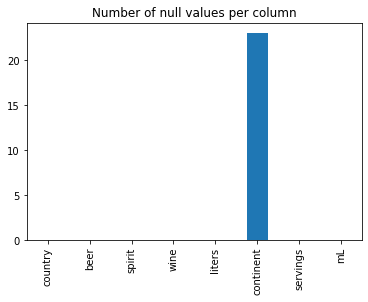

In [246]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [247]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0
10,Azerbaijan,21,46,5,1.3,EU,72,1300.0


In [248]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,4900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [ ]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

In [249]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [250]:
drinks

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0
5,Antigua & Barbuda,102,128,45,4.9,NA,275,4900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0


In [251]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('data/drinks.csv', 
                     header=0, 
                     names=drink_cols, 
                     na_filter=False)

In [252]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [253]:
drinks.isnull().sum()

country      0
beer         0
spirit       0
wine         0
liters       0
continent    0
dtype: int64

In [ ]:
drinks.beer.fillna(value=beer.median())

In [255]:
drinks.fillna?

<a id="exercise-three"></a>
### Exercise 3

In [258]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = 'data/ufo.csv'
ufo = pd.read_csv(ufo_data, parse_dates=['Time'])
ufo.sample(5)

,City,Colors Reported,Shape Reported,State,Time
28704,Wickenburg,ORANGE,DISK,AZ,2004-04-29 23:00:00
30601,Helena,NaN,LIGHT,MT,2004-10-08 22:30:00
40578,Chicago,NaN,DISK,IL,2007-07-05 11:00:00
8326,Wedowee,NaN,SPHERE,AL,1995-07-01 19:00:00
45325,Alpheretta,NaN,NaN,GA,2008-07-25 12:45:00


In [259]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [260]:
# Check the shape of the DataFrame.
ufo.shape

(80543, 5)

In [263]:
# What are the three most common colors reported?
ufo['Colors Reported'].value_counts().head(3)

ORANGE    5216
RED       4809
GREEN     1897
Name: Colors Reported, dtype: int64

In [266]:
# Rename any columns with spaces so that they don't contain spaces.
ufo.rename(columns={'Colors Reported': 'Colours_reported',
                   'Shape Reported': 'Shape_reported'}, inplace=True)

In [271]:
# For reports in VA, what's the most common city?
ufo[ufo.State == 'VA'].City.value_counts().head(1).index[0]

'Virginia Beach'

In [ ]:
ufo[ufo.State == 'VA'].City.value_counts().head(1)

In [272]:
# Print a DataFrame containing only reports from Arlington, VA.
ufo[(ufo.State == 'VA') & (ufo.City == 'Arlington')]

,City,Colours_reported,Shape_reported,State,Time
202,Arlington,GREEN,OVAL,VA,1952-07-13 21:00:00
6300,Arlington,NaN,CHEVRON,VA,1990-05-05 21:40:00
10278,Arlington,NaN,DISK,VA,1997-05-27 15:30:00
14527,Arlington,NaN,OTHER,VA,1999-09-10 21:41:00
17984,Arlington,RED,DISK,VA,2000-11-19 22:00:00
21201,Arlington,GREEN,FIREBALL,VA,2002-01-07 17:45:00
22633,Arlington,NaN,LIGHT,VA,2002-07-26 01:15:00
22780,Arlington,NaN,LIGHT,VA,2002-08-07 21:00:00
25066,Arlington,NaN,CIGAR,VA,2003-06-01 22:34:00
27398,Arlington,NaN,VARIOUS,VA,2003-12-13 02:00:00


In [273]:
# Count the number of missing values in each column.
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
City                80496 non-null object
Colours_reported    17034 non-null object
Shape_reported      72141 non-null object
State               80543 non-null object
Time                80543 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.1+ MB


In [277]:
ufo.info

<bound method DataFrame.info of                        City Colours_reported Shape_reported State  \
0                    Ithaca              NaN       TRIANGLE    NY   
1               Willingboro              NaN          OTHER    NJ   
2                   Holyoke              NaN           OVAL    CO   
3                   Abilene              NaN           DISK    KS   
4      New York Worlds Fair              NaN          LIGHT    NY   
5               Valley City              NaN           DISK    ND   
6               Crater Lake              NaN         CIRCLE    CA   
7                      Alma              NaN           DISK    MI   
8                   Eklutna              NaN          CIGAR    AK   
9                   Hubbard              NaN       CYLINDER    OR   
10                  Fontana              NaN          LIGHT    CA   
11                 Waterloo              NaN       FIREBALL    AL   
12                   Belton              RED         SPHERE    SC   
13

In [278]:
ufo.shape()

TypeError: 'tuple' object is not callable

In [274]:
ufo.isnull().sum()

City                   47
Colours_reported    63509
Shape_reported       8402
State                   0
Time                    0
dtype: int64

In [276]:
# How many rows remain if you drop all rows with any missing values?
ufo.dropna().shape[0]

15510

In [280]:
ufo.shape[0] - ufo.dropna().shape[0]

65033

In [284]:
ufo.isnull().any(axis=1).sum()

65033

In [ ]:
# select occupation, count(*) from users group by occupation
users.occupation.value_counts()

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [285]:
drinks.groupby('continent')

In [289]:
users.groupby('occupation').age.min()

occupation
administrator    12
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [290]:
users.groupby('occupation').age.max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [286]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [287]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [288]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [291]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer.agg(
    ['count', 'mean', 'min', 'max']
)

,count,mean,min,max
continent,,,,
AF,53,61.471698,0,376
AS,44,37.045455,0,247
EU,45,193.777778,0,361
NA,23,145.434783,1,285
OC,16,89.687500,0,306
SA,12,175.083333,93,333


In [292]:
drinks.groupby('continent').beer.agg(
    ['count', 'mean', 'min', 'max']
).sort_values('mean')

,count,mean,min,max
continent,,,,
AS,44,37.045455,0,247
AF,53,61.471698,0,376
OC,16,89.687500,0,306
NA,23,145.434783,1,285
SA,12,175.083333,93,333
EU,45,193.777778,0,361


In [293]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe()

beer                                                             \
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0   
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          spirit              ...    wine        liters                      \
           count        mean  ...     75%    max  count      mean       std   
continent                     ...                                             
AF          53.0   16.339623  ...   13.00  233.0   53.0  3.007547  2.647557   
AS          44.0   60.840909  ...    8.00  123.0   44.0  2.170455  2.770239   
EU          45.0  132.555556  ...  195.00  370.0   45.0  8.617778  3.358455   
NA          23.0  165.739130  ...   34.00  100.0   23.0  5.995652  2.409353   
OC          16.0   58.437500  ...   23.25  212.0   16.0  3.381250  3.345688   
SA          12.0  114.750000  ...   98.50  221.0   12.0  6.308333  1.531166   

                                           
           min   25%    50%     75%   max  
continent                                  
AF         0.0  0.70   2.30   4.700   9.1  
AS         0.0  0.10   1.20   2.425  11.5  
EU         0.0  6.60  10.00  10.900  14.4  
NA         2.2  4.30   6.30   7.000  11.9  
OC         0.0  1.00   1.75   6.150  10.4  
SA         3.8  5.25   6.85   7.375   8.3  

[6 rows x 32 columns]

In [295]:
drink_summary = drinks.groupby('continent').describe()
drink_summary.columns

MultiIndex(levels=[['beer', 'spirit', 'wine', 'liters'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]])

In [296]:
drink_summary[('beer', 'min')]

continent
AF     0.0
AS     0.0
EU     0.0
NA     1.0
OC     0.0
SA    93.0
Name: (beer, min), dtype: float64

In [297]:
# For each continent, count the number of rows.
print((drinks.groupby(['continent', 'country']).continent.count()))
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [298]:
# For each occupation in "users", count the number of occurrences.
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [301]:
users.groupby('occupation').occupation.count()

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: occupation, dtype: int64

In [303]:
# For each occupation, calculate the mean age.
users.groupby('occupation').age.mean().sort_values(ascending=False)

occupation
retired          63.071429
doctor           43.571429
educator         42.010526
healthcare       41.562500
librarian        40.000000
executive        38.718750
administrator    38.443038
marketing        37.615385
lawyer           36.750000
engineer         36.388060
writer           36.311111
salesman         35.666667
scientist        35.548387
other            34.523810
technician       33.148148
programmer       33.121212
homemaker        32.571429
artist           31.392857
entertainment    29.222222
none             26.555556
student          22.081633
Name: age, dtype: float64

In [304]:
# For each occupation, calculate the minimum and maximum ages.
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,12,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [306]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender']).age.mean().reset_index()

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,36.604651
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


In [309]:
age_summary = users.groupby(['occupation', 'gender']).age.mean()
age_summary.loc[('artist', 'F')]

30.307692307692307

In [310]:
age2 = users.groupby(['occupation', 'gender']).age.mean().reset_index()
age2[(age2.occupation == 'artist') & (age2.gender == 'F')]

,occupation,gender,age
2,artist,F,30.307692


----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [ ]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols]                    # ...and use that list to select columns.

In [ ]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']]

**Use `loc` to select columns by name.**

In [ ]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City']  

In [ ]:
# Select two columns.
ufo.loc[:, ['City', 'State']]

In [ ]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State']

In [ ]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

In [ ]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

In [ ]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

In [ ]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0/3 (City/State)
ufo.iloc[:, [0, 3]]

In [ ]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4]

In [ ]:
# Rows in position 0/1/2, all columns
ufo.iloc[0:3, :] 

In [312]:
import os
os.getcwd()

'D:\\Users\\gregb\\Documents\\MorganStanley\\DAT-course-materials\\lessons\\required\\exploratory-data-analysis'

In [314]:
os.path.exists('data/ufo.csv')

True

In [ ]:
# select * from table1, table2 where table1.colA = table2.colB

<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [317]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'data/movies.tbl'

movies = pd.read_csv(
    movies_filename,
    sep='|',
    header=None,
    names=movie_cols,
    usecols=[0, 1],
    encoding='latin-1')

movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [318]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'data/movie_ratings.tsv'

ratings = pd.read_csv(ratings_filename, 
                      sep='\t', header=None, 
                      names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [319]:
ratings.merge(movies, left_on='movie_id', right_on='movie_id')

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [320]:
ratings.merge(movies, on='movie_id')

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [321]:
ratings.merge(movies)

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [324]:
movie2 = movies.set_index('movie_id')
ratings.merge(movie2, left_on='movie_id', right_index=True)

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
253,63,242,3,875747190,Kolya (1996)
629,226,242,5,883888671,Kolya (1996)
1232,154,242,3,879138235,Kolya (1996)
2159,306,242,5,876503793,Kolya (1996)
2335,296,242,4,884196057,Kolya (1996)
2600,34,242,5,888601628,Kolya (1996)
3484,271,242,4,885844495,Kolya (1996)
4082,201,242,4,884110598,Kolya (1996)
5548,209,242,4,883589606,Kolya (1996)


In [325]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings = movies.merge(ratings, how='inner')
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [326]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


In [327]:
pd.merge?

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [ ]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda age: age < 30)

In [ ]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [ ]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})

In [ ]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [ ]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors Reported'].str.contains('RED', na='False') 

In [ ]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

In [ ]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)

In [ ]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [ ]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]

In [ ]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [ ]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [ ]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

In [ ]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)